In [10]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",version =1)

In [11]:
X = mnist.data
y = mnist.target
y = y.astype(np.uint8) # ! remember that target column is str



X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

### Confusion Matrix 
    - like we saw in the previous notebook , accuracy is not the preferred performance measure in the case of classsifiers
    - Confusion matrix is a much better evaluator 
    
### The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

In [14]:
from sklearn.model_selection import cross_val_predict
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set.This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

### this is how it works

In [20]:
from sklearn.model_selection import KFold
features = np.array([[0], [1], [2], [3], [4], [5]])
labels = np.array(['a', 'a', 'a', 'b', 'b', 'b'])

cv = KFold(n_splits = 3) # Provides train/test indices to split data in train/test sets.
# Split dataset into k consecutive folds (without shuffling by default)

In [30]:
all_pred = []
i = 1
for train_index , test_index in cv.split(features):
    print("iteration", i, ":")
    print("train indices:", train_index)
    print("train data:",features[train_index])
    print("test indices:", test_index)
    print("test data:", features[test_index])
    sgd_clf.fit(features[train_index], labels[train_index])
    ypred = sgd_clf.predict(features[test_index])
    print("predicted labels for data of indices", test_index, "are:", ypred)
    for predicted_label in ypred:
        all_pred.append(predicted_label)
    i += 1
    print("=====================================")
    print("This is what cross_val_predict returns :", all_pred)

iteration 1 :
train indices: [2 3 4 5]
train data: [[2]
 [3]
 [4]
 [5]]
test indices: [0 1]
test data: [[0]
 [1]]
predicted labels for data of indices [0 1] are: ['a' 'b']
This is what cross_val_predict returns : ['a', 'b']
iteration 2 :
train indices: [0 1 4 5]
train data: [[0]
 [1]
 [4]
 [5]]
test indices: [2 3]
test data: [[2]
 [3]]
predicted labels for data of indices [2 3] are: ['b' 'b']
This is what cross_val_predict returns : ['a', 'b', 'b', 'b']
iteration 3 :
train indices: [0 1 2 3]
train data: [[0]
 [1]
 [2]
 [3]]
test indices: [4 5]
test data: [[4]
 [5]]
predicted labels for data of indices [4 5] are: ['a' 'a']
This is what cross_val_predict returns : ['a', 'b', 'b', 'b', 'a', 'a']


In [38]:
#let's see the confusion matrix

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

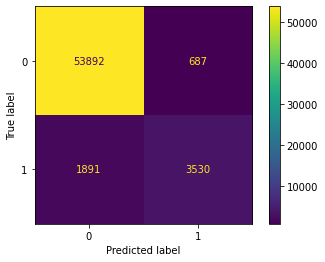

In [42]:
display_CM = ConfusionMatrixDisplay(confusion_matrix(y_train_5, y_train_pred))
display_CM.plot()

## Each row in a confusion matrix represents an actual class, while each column representsa predicted class.
    - The first row of this matrix considers non-5 images (the negative class): 53,892 of them     were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives).
    - The second row considers the images of 5s (the positive class):1,891 were wrongly classified as non-5s (false negatives), while the remaining 3,530 were correctly classified as 5s (true  positives).

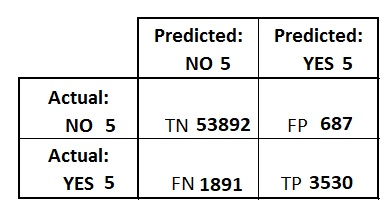